In [1]:
!pip install rdflib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 KB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 3.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [10]:
# Define the SPARQL query
# Use Lang tag and set to what language you want to filter by
query = """
SELECT ?subject ?predicate ?object
WHERE {
    ?subject ?predicate ?object .
    FILTER(REGEX(str(?predicate), "description", "i") && LANG(?object) = "de")
}
"""

# Execute the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Subject: {row['subject']}, Predicate: {row['predicate']}, Object: {row['object']}")


Subject: https://www.wikidata.org/about#liveDataAPIxml, Predicate: http://purl.org/dc/terms/description, Object: Der MediaWiki-API-Endpunkt. Das Format wird durch den Parameter „format“ angegeben.
Subject: https://www.wikidata.org/about#liveDataLDn3, Predicate: http://purl.org/dc/terms/description, Object: Der Verlinkte-Daten-Endpunkt. Das Format wird durch Inhaltsverhandlung aufgelöst.
Subject: https://www.wikidata.org/about#liveDataLDttl, Predicate: http://purl.org/dc/terms/description, Object: Der Verlinkte-Daten-Endpunkt. Das Format wird durch Inhaltsverhandlung aufgelöst.
Subject: https://www.wikidata.org/about#dumpData20240506, Predicate: http://purl.org/dc/terms/description, Object: Ein statischer Auszug aller Instanzen für das angegebene Datum.
Subject: https://www.wikidata.org/about#dumpDist20240506jsongz, Predicate: http://purl.org/dc/terms/description, Object: Eine json-Datei, gzip-komprimiert.
Subject: https://www.wikidata.org/about#liveDataLDrdf, Predicate: http://purl.org

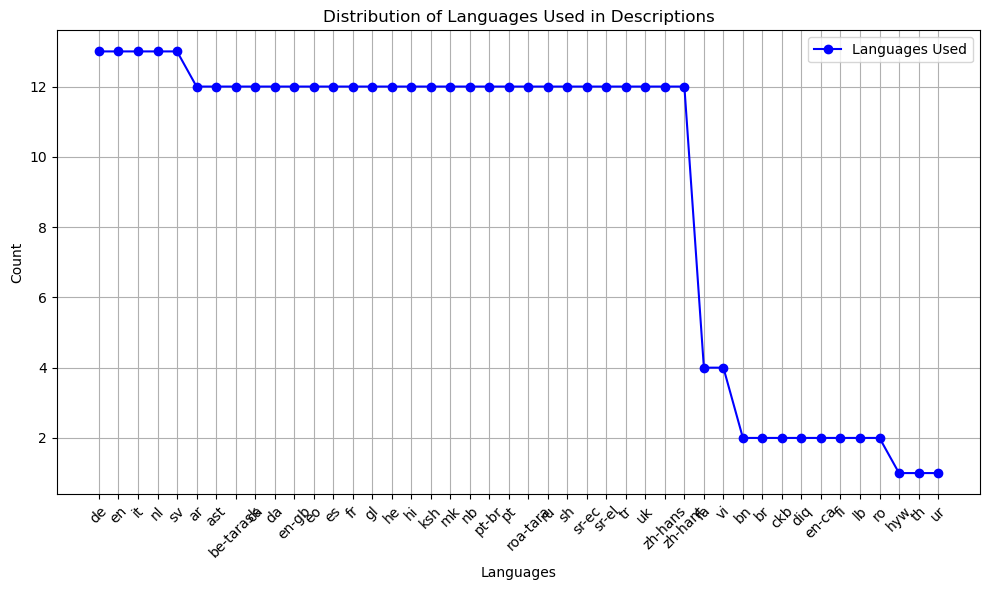

In [3]:
import rdflib
import matplotlib.pyplot as plt

# Load the RDF dataset
g = rdflib.Graph()
g.parse("dcatap.rdf", format="xml")

# Define the SPARQL query to count languages
query = """
PREFIX dc: <http://purl.org/dc/terms/>

SELECT (LANG(?description) AS ?lang) (COUNT(*) AS ?languageCount)
WHERE {
    ?subject dc:description ?description .
    FILTER(langMatches(lang(?description), '*'))
}
GROUP BY LANG(?description)
ORDER BY DESC(?languageCount)
"""

# Execute the query
results = g.query(query)

# Extracting data for plotting
languages = []
counts = []

for row in results:
    languages.append(row['lang'])
    counts.append(row['languageCount'].toPython())

# Plotting the data as a curve chart (line plot)
plt.figure(figsize=(10, 6))
plt.plot(languages, counts, marker='o', linestyle='-', color='b', label='Languages Used')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Distribution of Languages Used in Descriptions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


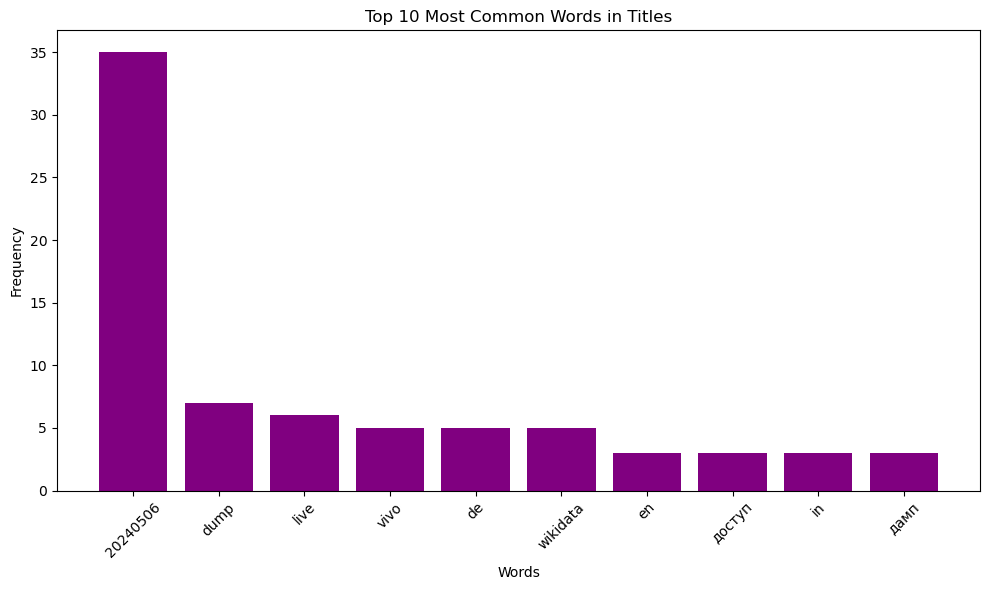

In [4]:
from collections import Counter
import re

# SPARQL query to get all titles
query_titles = """
PREFIX dc: <http://purl.org/dc/terms/>

SELECT ?title
WHERE {
    ?subject dc:title ?title .
}
"""

# Execute the query
results_titles = g.query(query_titles)

# Extract titles and count word frequencies
titles = [str(row['title']) for row in results_titles]
word_counter = Counter()

for title in titles:
    words = re.findall(r'\w+', title.lower())  # Tokenize and normalize to lowercase
    word_counter.update(words)

# Plotting the most common words
common_words = word_counter.most_common(10)
words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='purple')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


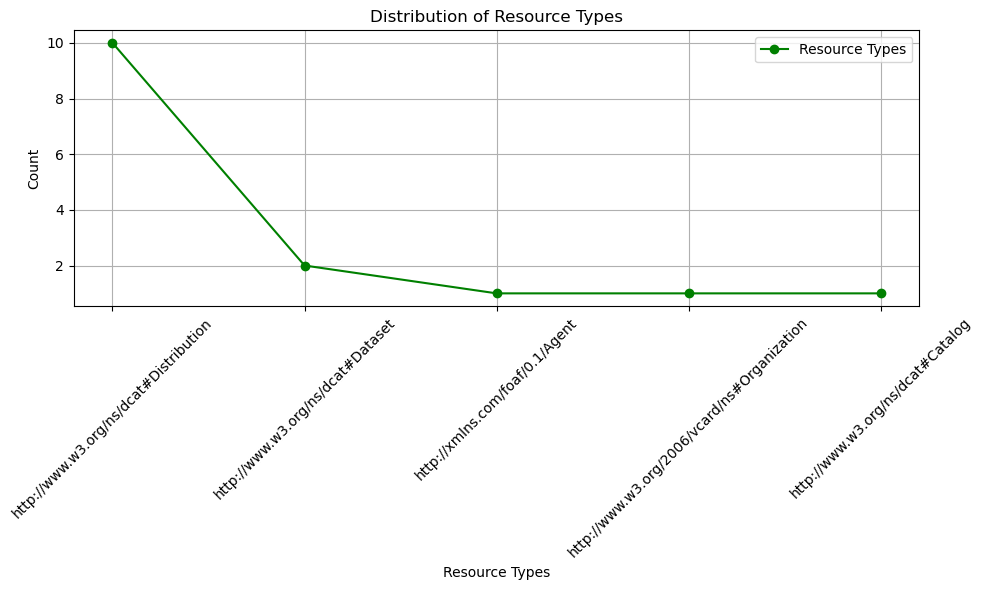

In [5]:
query_types = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT (COUNT(?type) AS ?typeCount) ?type
WHERE {
    ?subject rdf:type ?type .
}
GROUP BY ?type
ORDER BY DESC(?typeCount)
"""

# Execute the query
results_types = g.query(query_types)

# Extract data for plotting
types = []
type_counts = []

for row in results_types:
    types.append(row['type'].toPython())
    type_counts.append(row['typeCount'].toPython())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(types, type_counts, marker='o', linestyle='-', color='g', label='Resource Types')
plt.xlabel('Resource Types')
plt.ylabel('Count')
plt.title('Distribution of Resource Types')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
